In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
price_pridiction = pd.read_csv("HousingData.csv")

In [3]:
price_pridiction

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
price_pridiction.shape

(506, 14)

In [5]:
price_pridiction.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
#  Cleaning Data

price_pridiction["CRIM"] = price_pridiction["CRIM"].fillna(price_pridiction["CRIM"].mean())
price_pridiction["ZN"] = price_pridiction["ZN"].fillna(price_pridiction["ZN"].mean())
price_pridiction["INDUS"] = price_pridiction["INDUS"].fillna(price_pridiction["INDUS"].mean())
price_pridiction["CHAS"] = price_pridiction["CHAS"].fillna(price_pridiction["CHAS"].mean())
price_pridiction["AGE"] = price_pridiction["AGE"].fillna(price_pridiction["AGE"].mean())
price_pridiction["LSTAT"] = price_pridiction["LSTAT"].fillna(price_pridiction["LSTAT"].mean())


In [7]:
price_pridiction.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
price_pridiction.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# Positive correlation 
# negative correlation

correlation = price_pridiction.corr()

<Axes: >

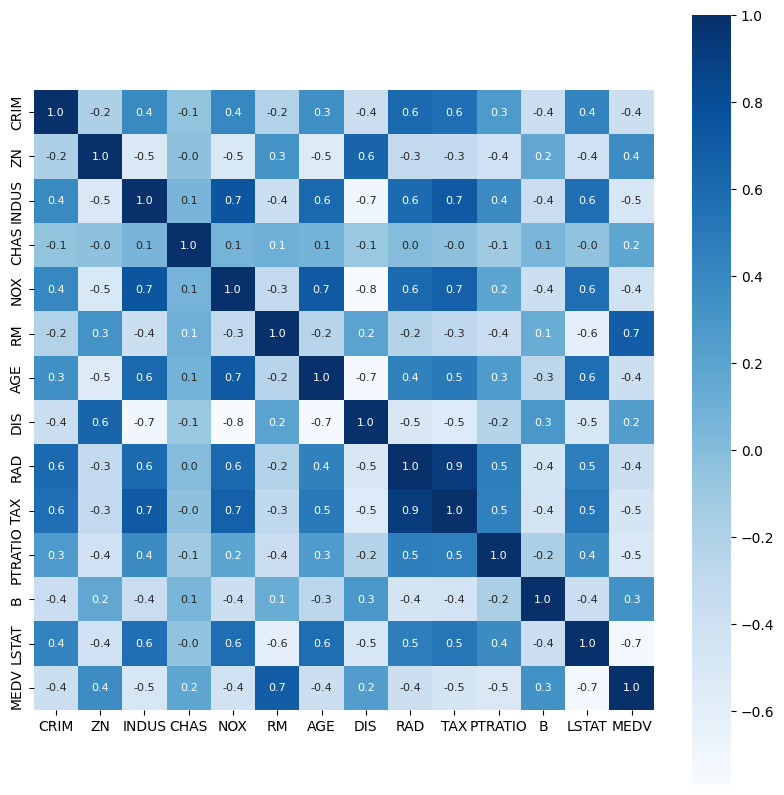

In [10]:
# heat map of correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size":8} , cmap = "Blues")

In [11]:
# splits data

x = price_pridiction.drop(["MEDV"], axis=1)
y = price_pridiction["MEDV"]

In [12]:
print(x)

        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.200000  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900000  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.100000  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.800000  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200000  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.100000  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.700000  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300000  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  68.518519  2.5050    1  273   

     PTRATIO       B      LSTAT  
0       15.3  396.90   4.9800

In [13]:
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [14]:
# splits data into train and test data

x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 2)


In [15]:
print(x.shape, x_train.shape, x_test.shape)

(506, 13) (404, 13) (102, 13)


In [16]:
model = XGBRegressor()

In [17]:
# train model

model.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [18]:
#  accuracy of pridiction of train data 
train_price_pridiction = model.predict(x_train)

In [19]:
print(train_price_pridiction)

[23.111933  21.002054  20.098005  34.6785    13.903282  13.50405
 21.99768   15.185856  10.898882  22.693007  13.793858   5.588061
 29.800228  50.001865  34.895287  20.598177  23.39295   19.206455
 32.701313  19.612007  26.988474   8.401995  45.99861   21.709255
 27.087645  19.361818  19.29078   24.79976   22.606655  31.695913
 18.544813   8.69803   17.412104  23.69795   13.300306  10.503882
 12.704823  24.999336  19.694311  14.86768   24.191     25.001179
 14.9010935 16.999802  15.599213  12.70874   24.514244  15.015075
 50.000168  17.517124  21.198206  32.001003  15.598514  22.89534
 19.298925  18.713509  23.297705  37.200474  30.097256  33.096275
 20.99633   49.994064  13.402074   5.011779  16.499424   8.394517
 28.678583  19.511633  20.586819  45.41904   39.800873  33.396564
 19.80326   33.40312   25.283972  50.00732   12.525352  17.445702
 18.598032  22.603727  50.01068   23.792957  23.312153  23.079176
 41.696415  16.109999  31.621521  36.09384    7.00184   20.38224
 19.994478  1

In [20]:
#  r square error

score_1 = metrics.r2_score(y_train, train_price_pridiction)

# mean absolute error

score_2 = metrics.mean_absolute_error(y_train, train_price_pridiction)

print("R square Error: ", score_1)

print("Mean absolute error : ", score_2)

R square Error:  0.9999978610042701
Mean absolute error :  0.00928458813393476


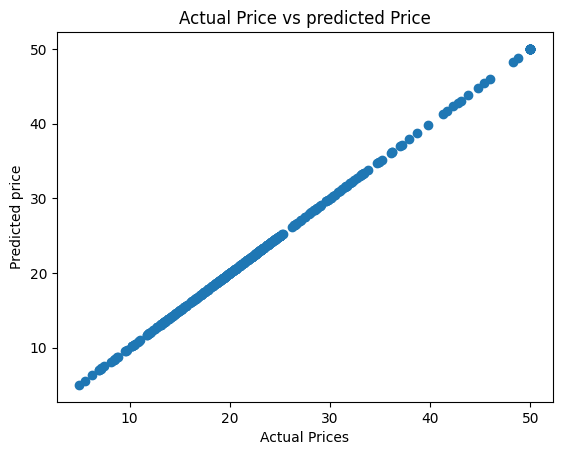

In [21]:
plt.scatter(y_train, train_price_pridiction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted price")
plt.title("Actual Price vs predicted Price")
plt.show()

In [22]:
#  accuracy of pridiction of test data 
test_price_pridiction = model.predict(x_test)

In [24]:
#  r square error

score_1 = metrics.r2_score(y_test, test_price_pridiction)

# mean absolute error

score_2 = metrics.mean_absolute_error(y_test, test_price_pridiction)

print("R square Error: ", score_1)

print("Mean absolute error : ", score_2)

R square Error:  0.8960185116688638
Mean absolute error :  2.2241158204920146
